   #  Transfert Learning in Mario Bross

codigo : 202015791
Grange Thomas

To begin with, i had to collect data from the game gym-super-mario-bross.

I collected these data for each level I wished to, that is level 1 & 8 for the 'easy' set, as the differences between these two levels are huge, hence it will be mas simple for the neural network to train, identifying features that differ. The 'difficult' set will be level 1 & 2.

Below, the code that allowed me to collect the screenshots from Mario Bross.
I've commented it as it generates a huge amount of screenshot, but one simply needs to change 'monde' (world) and 'niv' to select the level & the stage from which the screenshots are extracted.


Here I set the directories for the easy set.

In [1]:
import os
base_dir = 'monde'
train_dir = os.path.join(base_dir, 'train1')
test_dir = os.path.join(base_dir, 'test1')

# Directory with our training world1 pictures
train1_monde1_dir = os.path.join(train_dir, 'monde1')

# Directory with our training world2 pictures
train1_monde2_dir = os.path.join(train_dir, 'monde2')

# Directory with our test world1 pictures
test1_monde1_dir = os.path.join(test_dir, 'monde1')

# Directory with our test world2 pictures (in fact it is world 8, but it doesn't matter since it is binarial clas.)
test1_monde2_dir = os.path.join(test_dir, 'monde2')

And here the directories of the difficult one.

In [2]:

train_dir_dificil = os.path.join(base_dir, 'train_world_1_2')
test_dir_dificil = os.path.join(base_dir, 'test_world_1_2')

# Directory with our training world1 pictures
train1_monde1_dir_dif = os.path.join(train_dir_dificil, 'monde1')

# Directory with our training world2 pictures
train1_monde2_dir_dif = os.path.join(train_dir_dificil, 'monde2')

# Directory with our test world1 pictures
test1_monde1_dir_dif = os.path.join(test_dir_dificil, 'monde1')

# Directory with our test world2 pictures 
test1_monde2_dir_dif = os.path.join(test_dir_dificil, 'monde2')

We turn the images into an expoitable variable

In [3]:
train1_monde1_fnames = os.listdir(train1_monde1_dir)

train1_monde2_fnames = os.listdir(train1_monde2_dir)
train1_monde2_fnames.sort()


In [4]:
train1_monde1_fnames_dif = os.listdir(train1_monde1_dir_dif)

train1_monde2_fnames_dif = os.listdir(train1_monde2_dir_dif)
train1_monde2_fnames_dif.sort()

Display of the data set, the easy one, that is level 1 and level 8.

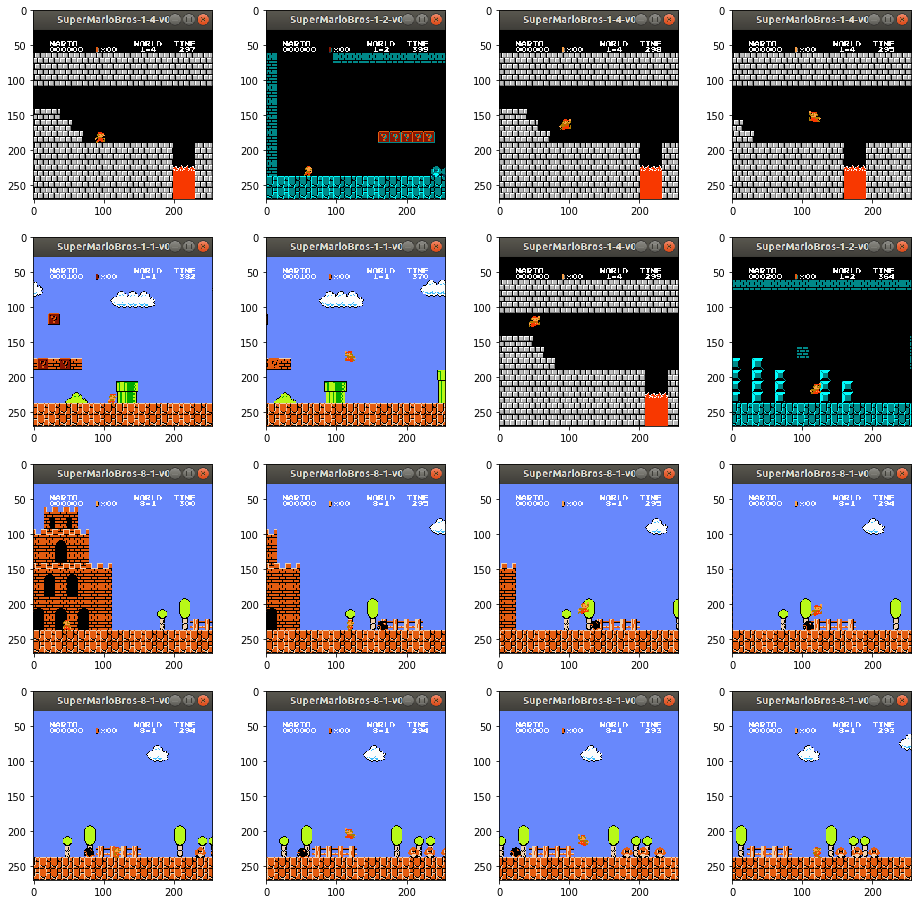

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_world1_pix = [os.path.join(train1_monde1_dir, fname) 
                for fname in train1_monde1_fnames[pic_index-8:pic_index]]
next_world2_pix = [os.path.join(train1_monde2_dir, fname) 
                for fname in train1_monde2_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_world1_pix+next_world2_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras import losses

Now I'm going to build a network of convolucional neurons, the most used for image processing, because they allow to extract important features for identification from images.

In [7]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

A convolucional network is composed of 4 main layers, which can be expanded, I have here built a very simple one.

First layer : Convolution: detects features using convolution filtering, features make filters, each is defined by a convolution kernel. The image is filtered with each kernel. The convolution between the image and a filter produces an activation map or feature map. Backpropagation keeps updating these features.
<img src="feature_detecion.png">

Second layer : Pooling : extracts the features maps' maximum local. Thus a smaller feature map is issued, reducing the number of parameters.
<img src="pooling.png">

Third layer : Activation : ReLu activation, which replaces all negatives inputs by zeros. It allows to use only one neuron at a time, saving cumputacional working time.
In output we will use sigoid activation, because we want a probability between 0 and 1 in the case of the binary classification, which represents the percentage of chances that the image belongs to one of the two classes.

Fourth layer : Fully connected : In a fully connected layer, we flatten the output of the last convolution layer and connect every node of the current layer with the other node of the next layer. Neurons in a fully connected layer have full connections to all activations in the previous layer.


In [8]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

Then these images had to be processed so that i could feed the convutional neural network (CNN).
As all screenshots came from the same window, their all have the same size. To allow the data to be eaten by the CNN, one should normalize it so that it would range from 0 to 1.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_gen = train_datagen.flow_from_directory(
        train_dir_dificil,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=16,
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
test_gen = val_datagen.flow_from_directory(
        test_dir_dificil,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 800 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


Let's train our model !

In [13]:
history = model.fit_generator(
      train_gen,
      steps_per_epoch=50,  # 1600 images = batch_size * steps
      epochs=10,
      validation_data=test_gen,
      validation_steps=10,  # 160 images = batch_size * steps
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 10 steps
Epoch 1/10
50/50 - 14s - loss: 0.5614 - acc: 0.6950 - val_loss: 0.3991 - val_acc: 0.8875
Epoch 2/10
50/50 - 12s - loss: 0.3414 - acc: 0.8625 - val_loss: 0.2588 - val_acc: 0.9000
Epoch 3/10
50/50 - 12s - loss: 0.2150 - acc: 0.9337 - val_loss: 0.1871 - val_acc: 0.9062
Epoch 4/10
50/50 - 14s - loss: 0.1441 - acc: 0.9425 - val_loss: 0.1216 - val_acc: 0.9875
Epoch 5/10
50/50 - 14s - loss: 0.0970 - acc: 0.9700 - val_loss: 0.1016 - val_acc: 0.9875
Epoch 6/10
50/50 - 14s - loss: 0.0700 - acc: 0.9812 - val_loss: 0.0558 - val_acc: 0.9937
Epoch 7/10
50/50 - 14s - loss: 0.0394 - acc: 0.9950 - val_loss: 0.0451 - val_acc: 0.9750
Epoch 8/10
50/50 - 14s - loss: 0.0346 - acc: 0.9862 - val_loss: 0.0382 - val_acc: 0.9750
Epoch 9/10
50/50 - 14s - loss: 0.0149 - acc: 0.9987 - val_loss: 0.0160 - val_acc: 1.0000
Epoch 10/10
50/50 - 15s - loss:

The results are good, as the curbs are close to one another, there is neither underfitting nor overfitting.

Text(0.5, 1.0, 'Training and validation loss')

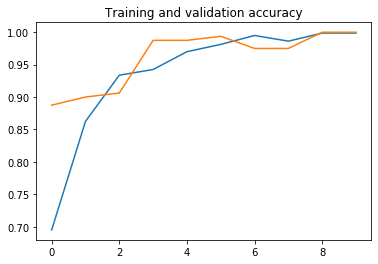

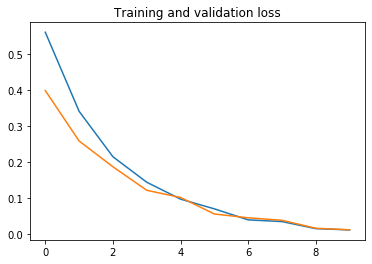

In [14]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [15]:
#saving the model
model.save('mod1.h5')

I repeat the same process of image processing & model training with the 'easy' set.

In [16]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=16,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(150, 150),
                                                     class_mode='binary')
test_data_gen = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')



Found 1600 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


CNN very similar, I've nonetheless added dropout, to reduce overfitting, as I had a lot at first.

In [17]:

model_new = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(150, 150 ,3)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])


In [18]:
model_new.compile(optimizer='adam',
                  loss=losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0

In [19]:
history2 = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=100,  # 1600 images = batch_size * steps
    epochs=12,
    validation_data=test_data_gen,
    validation_steps=10,  # 800 images = batch_size * steps
    verbose=2)



  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 10 steps
Epoch 1/12
100/100 - 30s - loss: 0.8039 - accuracy: 0.5969 - val_loss: 0.4322 - val_accuracy: 0.7625
Epoch 2/12
100/100 - 27s - loss: 0.4641 - accuracy: 0.6956 - val_loss: 0.3781 - val_accuracy: 0.8062
Epoch 3/12
100/100 - 30s - loss: 0.4246 - accuracy: 0.7325 - val_loss: 0.3272 - val_accuracy: 0.8375
Epoch 4/12
100/100 - 29s - loss: 0.4052 - accuracy: 0.7419 - val_loss: 0.3087 - val_accuracy: 0.8750
Epoch 5/12
100/100 - 30s - loss: 0.4144 - accuracy: 0.7475 - val_loss: 0.3512 - val_accuracy: 0.8625
Epoch 6/12
100/100 - 30s - loss: 0.4073 - accuracy: 0.7431 - val_loss: 0.3821 - val_accuracy: 0.8375
Epoch 7/12
100/100 - 30s - loss: 0.3554 - accuracy: 0.8094 - val_loss: 0.2432 - val_accuracy: 0.9125
Epoch 8/12
100/100 - 32s - loss: 0.2803 - accuracy: 0.8756 - val_loss: 0.2274 - val_accuracy: 0.9062
Epoch 9/12
100/100 - 29s - loss: 0.2199 - accuracy: 0.9112 - val_loss: 0.0569 - val_accuracy: 0.987

Text(0.5, 1.0, 'Training and validation loss')

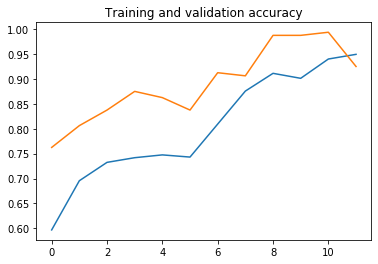

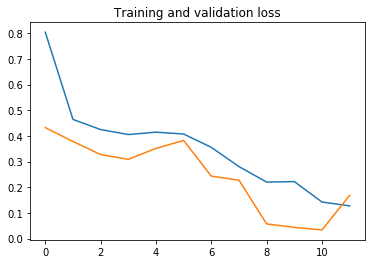

In [20]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')


Eventhough I have a little bit of underfitting outher, the results are good. Nonetheless, they are worse than those of the 'easy' set, which is weird as I have used dropout on this model, and I have increased the numbers of images by transforming them.

In [21]:
#saving the second model
model_new.save('mod2.h5')

Now for the transfer learning, I'll use the model trained with the 'easy' set to process the data from the hard one. The features learnt on an easy model will be used to classify the hard one.

In [22]:
from tensorflow.keras.models import load_model 
modeltest2 = load_model('mod2.h5')
modeltest1=load_model('mod1.h5')

In [23]:
modeltest2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history3 = modeltest1.fit_generator(
      train_gen,
      steps_per_epoch=50,  # 1600 images = batch_size * steps
      epochs=8,
      validation_data=test_gen,
      validation_steps=10,  # 160 images = batch_size * steps
      verbose=2)          

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 10 steps
Epoch 1/8
50/50 - 16s - loss: 0.0058 - acc: 0.9987 - val_loss: 0.0304 - val_acc: 0.9875
Epoch 2/8
50/50 - 15s - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 3/8
50/50 - 16s - loss: 0.0075 - acc: 0.9975 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 4/8
50/50 - 14s - loss: 0.0035 - acc: 0.9987 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 5/8
50/50 - 14s - loss: 4.2165e-04 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 6/8
50/50 - 14s - loss: 0.0024 - acc: 0.9987 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 7/8
50/50 - 14s - loss: 0.0036 - acc: 0.9987 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 8/8
50/50 - 14s - loss: 1.5168e-04 - acc: 1.0000 - val_loss: 0.0083 - val_acc: 1.0000


Text(0.5, 1.0, 'Training and validation loss')

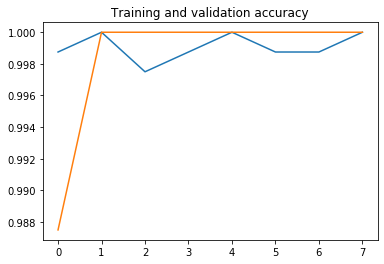

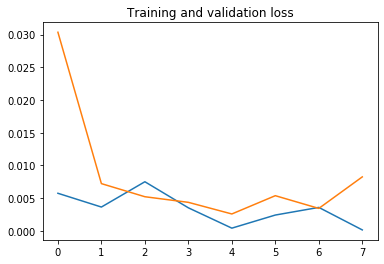

In [24]:
# Retrieve a list of accuracy results on training and validation data
acc = history3.history['acc']
val_acc = history3.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history3.history['loss']
val_loss = history3.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

The results of the hard set processed with the model trained with the easy set are excelent. As the initials results (without transfer) were good, way too good, this is not surprising.

I did this exercice with a classic set (cats and dogs) and obtained the following results : 75% of success without any help, 80/85% with more layers, dropout. And with transfer learning ( with the VGG-16 model, but also with the one i've trained myself ), I've reached 93%.

Here the results are too good, but I did it with the images I collected.

# Sources : 

Tensorflow Documentation : https://www.tensorflow.org/tutorials/images/classification

Greg Surma, Image Classifier - Cats🐱 vs Dogs🐶 : https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8

Ashwin Joy, Image Classification using Keras : https://pythonistaplanet.com/image-classification-using-deep-learning/

Fernando Lozano, Redes Neuronales, Kernels, Redes Profundas

[Sutton and Barto, 2018] Sutton, R. S. and Barto, A. G. (2018).Reinforcement Learning:An Introduction. The MIT Press, second edition.
